In [1]:
import os, sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import climtas
import map_trend_functions as mapTrend
import dask.distributed
import tempfile

ERROR! Session/line number was not unique in database. History logging moved to new session 573


In [2]:
tmpdir = tempfile.TemporaryDirectory('dask-worker-space')
dask.distributed.Client(local_directory=tmpdir.name, memory_limit='16gb')

2022-07-22 14:00:18,687 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2022-07-22 14:00:18,692 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-07-22 14:00:18,693 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/distributed/nanny.py", line 904, in _run
    loop.run_sync(run)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/tornado/ioloop.py", line 524, in run_sync
    self.start()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/g/data/h

Task exception was never retrieved
future: <Task finished name='Task-1' coro=<WorkerProcess._run.<locals>.run() done, defined at /g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/distributed/nanny.py:857> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/distributed/nanny.py", line 904, in _run
    loop.run_sync(run)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/tornado/ioloop.py", line 524, in run_sync
    self.start()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
    self._run_once()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.0

KeyboardInterrupt: 

In [3]:
sys.path.append('../functions/')
# import trend_functions_2 as tf2
# Collection of statistics
import load_dataset as load
from importlib import reload
import phase_calc_functions as phase_calc

image_dir = '/g/data/w40/ab2313/images/mjo_and_rainfall_trend_images/'

In [4]:
import climtas
import xesmf

In [22]:
reload(load)
olr_da =  load.load_olr_da() #chunks = {'latitude':-1, 'longitude':-1, 'time': 800})

In [23]:
olr_da

<xarray.DataArray 'mtnlwrf' (time: 15796, lat: 121, lon: 281)>
dask.array<open_dataset-544a1bb783ed98c6486dc2ac5ba98503mtnlwrf, shape=(15796, 121, 281), dtype=float32, chunksize=(15796, 20, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-03-31
  * lon      (lon) float32 100.0 100.2 100.5 100.8 ... 169.2 169.5 169.8 170.0
  * lat      (lat) float32 -5.0 -5.25 -5.5 -5.75 ... -34.25 -34.5 -34.75 -35.0

In [24]:
olr_da = olr_da.compute()

KeyboardInterrupt: 

In [ ]:
olr_da

In [ ]:
olr_da.isel(time=0).plot()

In [ ]:
awap = load.load_awap()

In [ ]:
awap

In [25]:
regridder = xesmf.Regridder(olr_da, awap, method='bilinear')

In [26]:
olr_ds_regridded = regridder(olr_da)

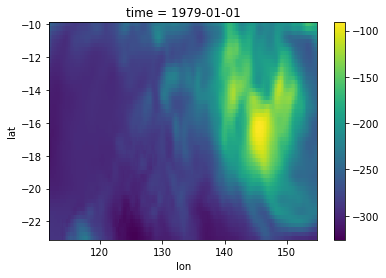

In [27]:
olr_ds_regridded.isel(time=0).plot()

In [30]:
olr_ds_regridded

<xarray.DataArray (time: 15796, lat: 53, lon: 172)>
array([[[-290.39777, -290.4019 , -290.49814, ..., -299.99097,
         -299.98184, -299.73755],
        [-290.59067, -290.72397, -290.8949 , ..., -291.00836,
         -291.9448 , -292.71786],
        [-290.9322 , -291.12534, -291.38092, ..., -273.70276,
         -278.2958 , -280.19907],
        ...,
        [-267.18262, -272.34644, -276.19153, ..., -205.51329,
         -201.87106, -200.9491 ],
        [-260.77914, -265.24677, -268.56213, ..., -184.0339 ,
         -187.22295, -190.49446],
        [-251.26344, -256.07538, -259.8819 , ..., -170.44324,
         -176.63472, -182.38655]],

       [[-295.8647 , -295.58057, -295.35556, ..., -278.0818 ,
         -279.02588, -280.09567],
        [-296.75546, -296.57266, -296.41537, ..., -279.0925 ,
         -279.94083, -280.87915],
        [-297.70062, -297.5758 , -297.48697, ..., -281.35278,
         -281.44983, -282.21066],
...
        [-260.25018, -258.8845 , -257.66647, ..., -224.70294,
         -220.43904, -214.0446 ],
        [-256.96115, -255.45656, -254.33984, ..., -230.15953,
         -220.40479, -210.33739],
        [-249.42958, -245.94206, -243.41225, ..., -233.78377,
         -222.51007, -211.46938]],

       [[-218.1294 , -204.40845, -190.39142, ..., -284.84192,
         -285.42606, -286.10562],
        [-216.24532, -200.97395, -187.43034, ..., -286.70703,
         -287.47327, -288.23578],
        [-213.16632, -197.73601, -185.62117, ..., -288.6105 ,
         -289.37674, -290.20175],
        ...,
        [-272.7284 , -273.28653, -273.3826 , ..., -281.1526 ,
         -281.4349 , -280.60406],
        [-271.95627, -272.58752, -272.7153 , ..., -280.73138,
         -281.20523, -280.52347],
        [-270.49997, -271.28195, -271.57782, ..., -280.05093,
         -280.55054, -279.93585]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-03-31
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 154.0 154.2 154.5 154.8
Attributes:
    regrid_method:  bilinear

In [33]:
olr_ds_regridded.lat.values

array([-23.  , -22.75, -22.5 , -22.25, -22.  , -21.75, -21.5 , -21.25,
       -21.  , -20.75, -20.5 , -20.25, -20.  , -19.75, -19.5 , -19.25,
       -19.  , -18.75, -18.5 , -18.25, -18.  , -17.75, -17.5 , -17.25,
       -17.  , -16.75, -16.5 , -16.25, -16.  , -15.75, -15.5 , -15.25,
       -15.  , -14.75, -14.5 , -14.25, -14.  , -13.75, -13.5 , -13.25,
       -13.  , -12.75, -12.5 , -12.25, -12.  , -11.75, -11.5 , -11.25,
       -11.  , -10.75, -10.5 , -10.25, -10.  ])

In [32]:
awap.lat.values

array([-23.  , -22.75, -22.5 , -22.25, -22.  , -21.75, -21.5 , -21.25,
       -21.  , -20.75, -20.5 , -20.25, -20.  , -19.75, -19.5 , -19.25,
       -19.  , -18.75, -18.5 , -18.25, -18.  , -17.75, -17.5 , -17.25,
       -17.  , -16.75, -16.5 , -16.25, -16.  , -15.75, -15.5 , -15.25,
       -15.  , -14.75, -14.5 , -14.25, -14.  , -13.75, -13.5 , -13.25,
       -13.  , -12.75, -12.5 , -12.25, -12.  , -11.75, -11.5 , -11.25,
       -11.  , -10.75, -10.5 , -10.25, -10.  ])

In [35]:
olr_ds_regridded.lon.values

array([112.  , 112.25, 112.5 , 112.75, 113.  , 113.25, 113.5 , 113.75,
       114.  , 114.25, 114.5 , 114.75, 115.  , 115.25, 115.5 , 115.75,
       116.  , 116.25, 116.5 , 116.75, 117.  , 117.25, 117.5 , 117.75,
       118.  , 118.25, 118.5 , 118.75, 119.  , 119.25, 119.5 , 119.75,
       120.  , 120.25, 120.5 , 120.75, 121.  , 121.25, 121.5 , 121.75,
       122.  , 122.25, 122.5 , 122.75, 123.  , 123.25, 123.5 , 123.75,
       124.  , 124.25, 124.5 , 124.75, 125.  , 125.25, 125.5 , 125.75,
       126.  , 126.25, 126.5 , 126.75, 127.  , 127.25, 127.5 , 127.75,
       128.  , 128.25, 128.5 , 128.75, 129.  , 129.25, 129.5 , 129.75,
       130.  , 130.25, 130.5 , 130.75, 131.  , 131.25, 131.5 , 131.75,
       132.  , 132.25, 132.5 , 132.75, 133.  , 133.25, 133.5 , 133.75,
       134.  , 134.25, 134.5 , 134.75, 135.  , 135.25, 135.5 , 135.75,
       136.  , 136.25, 136.5 , 136.75, 137.  , 137.25, 137.5 , 137.75,
       138.  , 138.25, 138.5 , 138.75, 139.  , 139.25, 139.5 , 139.75,
      

In [37]:
awap.lon.values

array([112.  , 112.25, 112.5 , 112.75, 113.  , 113.25, 113.5 , 113.75,
       114.  , 114.25, 114.5 , 114.75, 115.  , 115.25, 115.5 , 115.75,
       116.  , 116.25, 116.5 , 116.75, 117.  , 117.25, 117.5 , 117.75,
       118.  , 118.25, 118.5 , 118.75, 119.  , 119.25, 119.5 , 119.75,
       120.  , 120.25, 120.5 , 120.75, 121.  , 121.25, 121.5 , 121.75,
       122.  , 122.25, 122.5 , 122.75, 123.  , 123.25, 123.5 , 123.75,
       124.  , 124.25, 124.5 , 124.75, 125.  , 125.25, 125.5 , 125.75,
       126.  , 126.25, 126.5 , 126.75, 127.  , 127.25, 127.5 , 127.75,
       128.  , 128.25, 128.5 , 128.75, 129.  , 129.25, 129.5 , 129.75,
       130.  , 130.25, 130.5 , 130.75, 131.  , 131.25, 131.5 , 131.75,
       132.  , 132.25, 132.5 , 132.75, 133.  , 133.25, 133.5 , 133.75,
       134.  , 134.25, 134.5 , 134.75, 135.  , 135.25, 135.5 , 135.75,
       136.  , 136.25, 136.5 , 136.75, 137.  , 137.25, 137.5 , 137.75,
       138.  , 138.25, 138.5 , 138.75, 139.  , 139.25, 139.5 , 139.75,
      

In [38]:
ROOT_DIR = '/g/data/w40/ab2313/mjo_and_rainfall_trend'

In [39]:
olr_ds_regridded.to_netcdf(os.path.join(ROOT_DIR, 'era5.mtnlwrf.daily.0p25.nc'))